# Image Data Augmentation Using Deep Convolutional Generative Adversarial Network (DCGAN)
# Data Transformation

## Load Libraries

In [1]:
%matplotlib inline

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import myUtilities as myUtils
import pandas as pd
import random

## Load Data

In [2]:
# Load an image and all its masks.
image_list = []
new_image = False
done = False
for root, dirs, files in os.walk("data/train/stage1_train"):
    for afile in files:
        # if an image file
        rootdir = root.split('/')
        if rootdir[len(rootdir) - 1] == 'images':
            if new_image:
                #Already read an image, quit.
                done = True
                break
            else:
                # Read the image file.
                new_image = True
                image_list.append(mpimg.imread(os.path.join(root, afile)))
        elif new_image:
            # This is not an image file, it is therefore a mask file.
            # There is an image file already read, read the mask.
            image_list.append(mpimg.imread(os.path.join(root, afile)))
    if done:
        break

In [3]:
len(image_list)

258

There are a total 257 masks for this one image.

In [4]:
image_list[0]

array([[[0.3764706 , 0.3764706 , 0.3764706 , 1.        ],
        [0.38431373, 0.38431373, 0.38431373, 1.        ],
        [0.3529412 , 0.3529412 , 0.3529412 , 1.        ],
        ...,
        [0.1882353 , 0.1882353 , 0.1882353 , 1.        ],
        [0.2       , 0.2       , 0.2       , 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ]],

       [[0.37254903, 0.37254903, 0.37254903, 1.        ],
        [0.35686275, 0.35686275, 0.35686275, 1.        ],
        [0.34117648, 0.34117648, 0.34117648, 1.        ],
        ...,
        [0.1764706 , 0.1764706 , 0.1764706 , 1.        ],
        [0.19215687, 0.19215687, 0.19215687, 1.        ],
        [0.21568628, 0.21568628, 0.21568628, 1.        ]],

       [[0.34509805, 0.34509805, 0.34509805, 1.        ],
        [0.34117648, 0.34117648, 0.34117648, 1.        ],
        [0.31764707, 0.31764707, 0.31764707, 1.        ],
        ...,
        [0.16862746, 0.16862746, 0.16862746, 1.        ],
        [0.1882353 , 0.188235

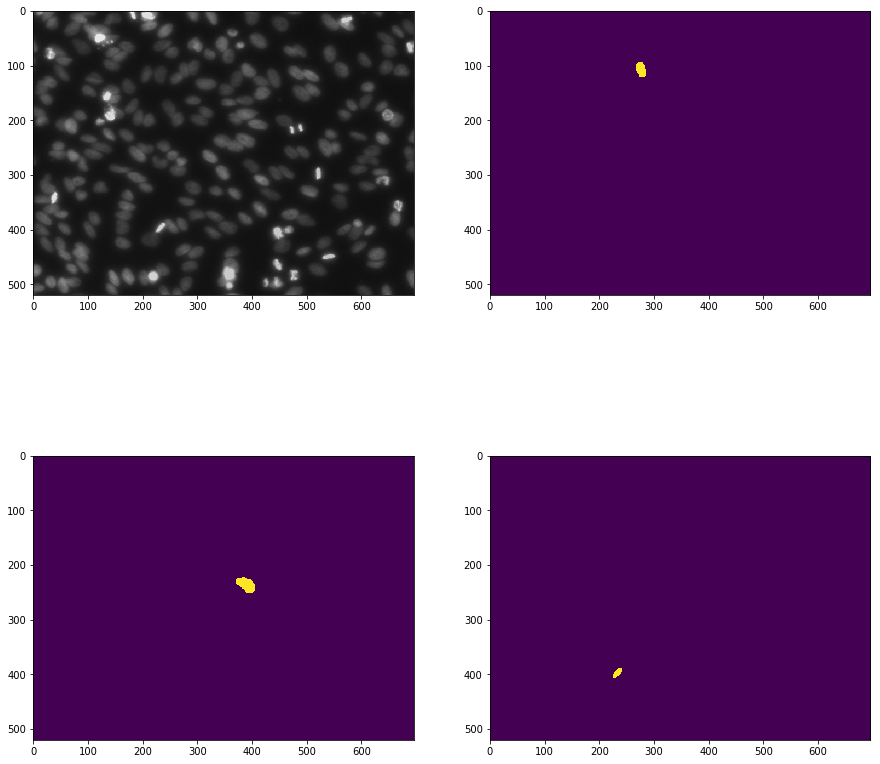

In [5]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(image_list[0])
plt.subplot(222)
plt.imshow(image_list[1])
plt.subplot(223)
plt.imshow(image_list[2])
plt.subplot(224)
plt.imshow(image_list[3])
plt.show()

## Combine all the masks into a single image

In [6]:
image_list[2][230:250, 390:410]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.

In [7]:
image_list[1].shape

(520, 696)

In [8]:
all_masks = np.zeros(image_list[1].shape)
for i in image_list[1:]:
    all_masks = np.logical_or(all_masks, i)

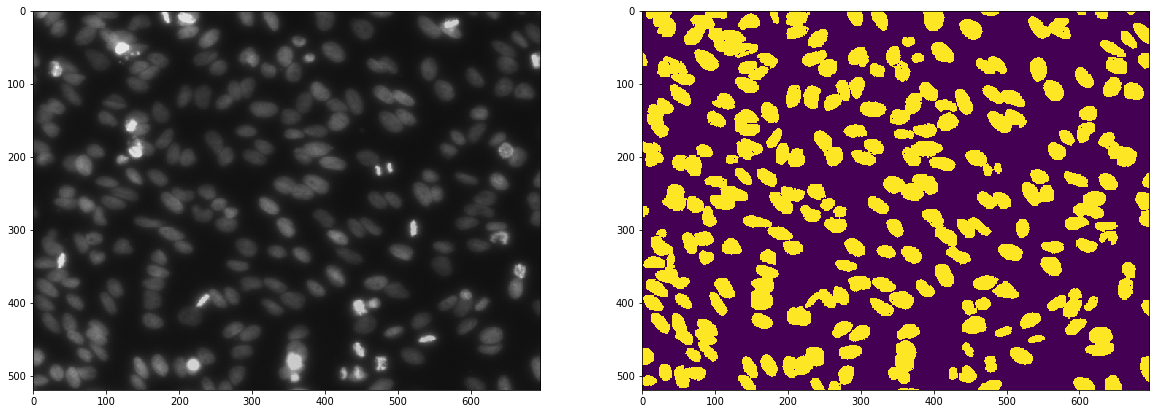

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(image_list[0])
plt.subplot(122)
plt.imshow(all_masks)
plt.show()

## Explore the file sizes in the training image dataset

In [10]:
file_size_list = myUtils.get_all_train_images_filesizes()

In [11]:
file_size_list[:10]

[['547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6.png',
  [696, 520]],
 ['0bf4b144167694b6846d584cf52c458f34f28fcae75328a2a096c8214e01c0d0.png',
  [256, 256]],
 ['f534b43bf37ff946a310a0f08315d76c3fb3394681cf523acef7c0682240072a.png',
  [256, 256]],
 ['0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a3893a7d5835c85284132e.png',
  [320, 256]],
 ['c6216cdc42f61bc345434986db42e2ef9b9741aee3210b7a808e952e319d2305.png',
  [256, 256]],
 ['8c3ef7aa7ed29b62a65b1c394d2b4a24aa3da25aebfdf3d29dbfc8ad1b08e95a.png',
  [696, 520]],
 ['21408476af0506331e8b5d49b385833e5ef1fbb90815fbf9af9d19b4bb145f76.png',
  [256, 256]],
 ['da79a2b105f055ce75404a04bf53bbb51d518d9381af7b4ac714c137f101d920.png',
  [256, 256]],
 ['72e8c49dea44787114fd191f9e97e260f961c6e7ae4715bc95cc91db8d91a4e3.png',
  [256, 256]],
 ['4ff152d76db095f75c664dd48e41e8c9953fd0e784535883916383165e28a08e.png',
  [256, 256]]]

In [12]:
df = pd.DataFrame(file_size_list, columns = ['file_name', 'image_size'])
df.head()

,file_name,image_size
0,547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3c...,"[696, 520]"
1,0bf4b144167694b6846d584cf52c458f34f28fcae75328...,"[256, 256]"
2,f534b43bf37ff946a310a0f08315d76c3fb3394681cf52...,"[256, 256]"
3,0e21d7b3eea8cdbbed60d51d72f4f8c1974c5d76a8a389...,"[320, 256]"
4,c6216cdc42f61bc345434986db42e2ef9b9741aee3210b...,"[256, 256]"


In [13]:
df['image_size'] = tuple(df['image_size'])
df['image_size'].value_counts()

(256, 256)      334
(320, 256)      112
(696, 520)       92
(360, 360)       91
(1024, 1024)     16
(640, 512)       13
(1272, 603)       6
(347, 260)        5
(1388, 1040)      1
Name: image_size, dtype: int64

The smallest image is 256 x 256. To be used for training the GAN, we need a fixed image size. We can crop each image to square (i.e. width=height) and resize to 256 x 256.

## Process all the images and masks in the training dataset.

In [14]:
x_train_list = myUtils.load_process_all_train_images(resize_to=256)

In [15]:
len(x_train_list)

670

In [16]:
for i in range(20):
    print(x_train_list[i][1].shape)

(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)
(256, 256, 5)


Check if the image and combined masks can be extracted from the processed images.

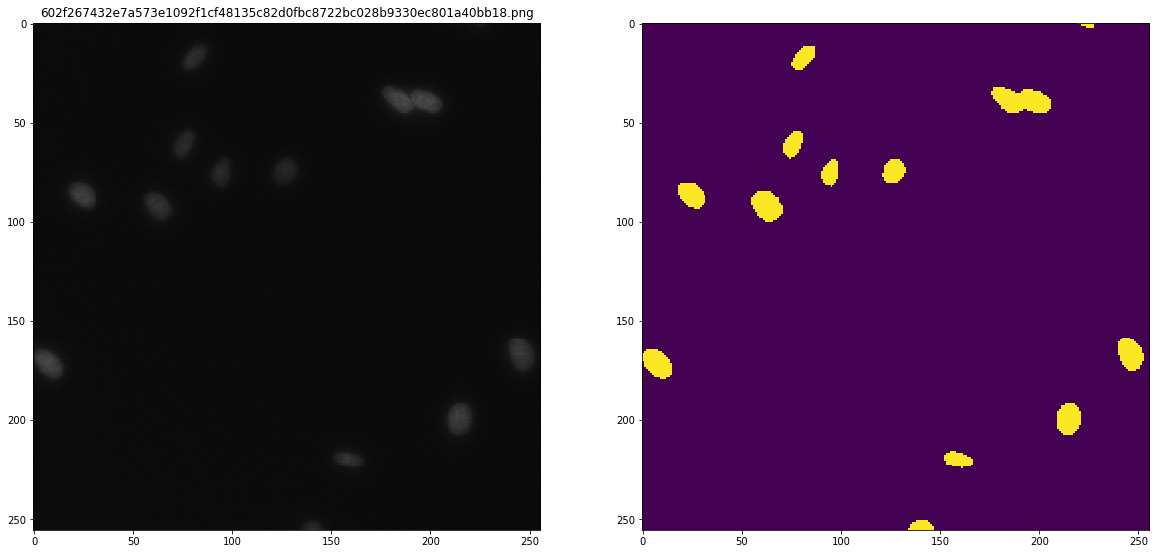

In [17]:
a_sample = random.sample(x_train_list, 1)
a_mask = a_sample[0][1][:, :, 4]
a_img = a_sample[0][1][:, :, 0:3]

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(a_img)
plt.title(a_sample[0][0])
plt.subplot(122)
plt.imshow(a_mask)
plt.show()

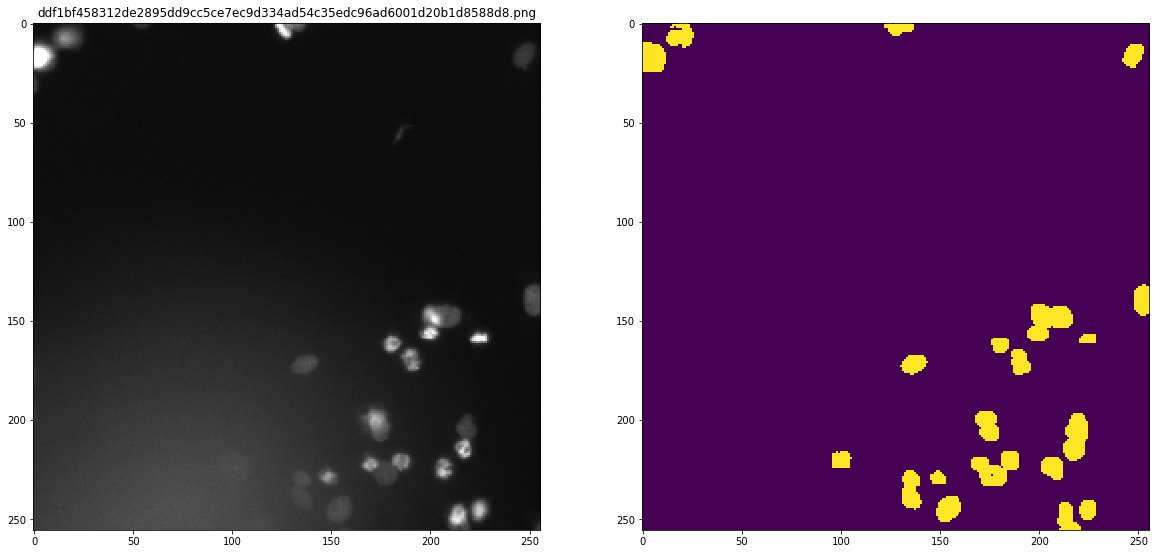

In [18]:
a_sample = random.sample(x_train_list, 1)
a_mask = a_sample[0][1][:, :, 4]
a_img = a_sample[0][1][:, :, 0:3]

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(a_img)
plt.title(a_sample[0][0])
plt.subplot(122)
plt.imshow(a_mask)
plt.show()

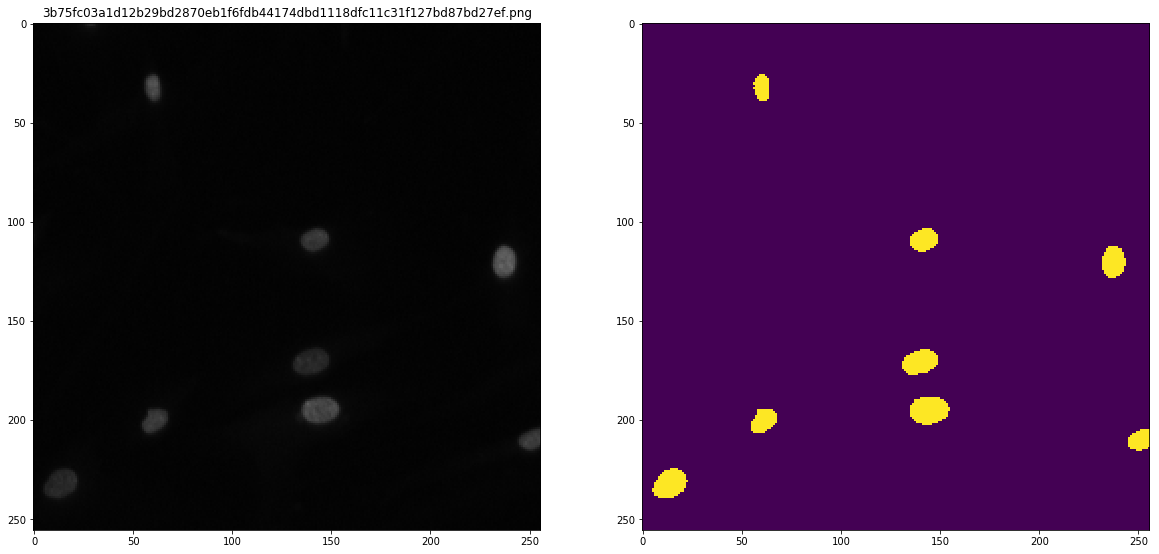

In [19]:
a_sample = random.sample(x_train_list, 1)
a_mask = a_sample[0][1][:, :, 4]
a_img = a_sample[0][1][:, :, 0:3]

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(a_img)
plt.title(a_sample[0][0])
plt.subplot(122)
plt.imshow(a_mask)
plt.show()

Looks good.

## Save the processed image files.

In [20]:
x_train_list[:1]

[['547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6.png',
  array([[[ 64,  64,  64, 255, 255],
          [ 70,  70,  70, 255, 255],
          [ 69,  69,  69, 255, 255],
          ...,
          [ 55,  55,  55, 255, 255],
          [ 52,  52,  52, 255, 255],
          [ 51,  51,  51, 255, 255]],
  
         [[ 66,  66,  66, 255, 255],
          [ 76,  76,  76, 255, 255],
          [ 75,  75,  75, 255, 255],
          ...,
          [ 49,  49,  49, 255, 255],
          [ 50,  50,  50, 255, 255],
          [ 49,  49,  49, 255, 255]],
  
         [[ 74,  74,  74, 255, 255],
          [ 73,  73,  73, 255, 255],
          [ 78,  78,  78, 255, 255],
          ...,
          [ 41,  41,  41, 255, 255],
          [ 42,  42,  42, 255, 255],
          [ 42,  42,  42, 255, 255]],
  
         ...,
  
         [[ 30,  30,  30, 255,   0],
          [ 29,  29,  29, 255,   0],
          [ 28,  28,  28, 255,   0],
          ...,
          [ 57,  57,  57, 255, 255],
          [ 54,  54,  5

In [21]:
# Save each image as numpy array to file
for image_name, a_image in x_train_list:
    filename = 'data/transformed/' + image_name.split('.')[0]
    np.save(filename, a_image)